<a href="https://colab.research.google.com/github/iqbal-svg/ai-ml-project/blob/main/iqbal_fbi_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -FBI timeseries



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual/Team
By-Iqbal Shaikh

# **Project Summary -**

FBI time series project is to make a PREDICTIVE ML model using time series data,and leverage it to give more safety to the public.by using this predictive model FBI can control crime rate and can take proper steps to impliment police force.

By using this we can estimate monthly crime.data includes day,month,year,hour,
minute,georaphical location,type of crime,neighbour location.this data gives spatial(location),temporal(time) of crime occurs,analysing data we make prdictions that helps FBI to enforce patroling in city of crime occurs.

By using this model government can take preventive measure to maintain law and order in city,also helps to take decision which place to put security camera,street light etc.also helps to make awareness in public

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Urban centers across the United States face increasing crime rates and complex crime dynamics, making it challenging for law enforcement agencies to anticipate and prevent criminal activities effectively. Traditional crime prevention methods often rely on reactive measures rather than proactive strategies. Without advanced analytical tools, law enforcement agencies struggle to allocate resources efficiently, optimize patrol schedules, and deploy personnel where they are needed most.

This project aims to develop a predictive model that estimates crime incidents on a monthly basis using detailed crime data, including time, location, and crime type. By leveraging spatial and temporal crime patterns, the model will help law enforcement agencies and policymakers make data-driven decisions to enhance public safety, improve resource allocation, and implement targeted crime prevention strategies.









# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd  # Data manipulation and cleaning
import numpy as np  # Numerical computations and array handling
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical data visualization
import geopandas as gpd  # Geospatial data handling
import statsmodels.api as sm  # Statistical modeling and time series analysis
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.preprocessing import StandardScaler  # Data preprocessing
from sklearn.ensemble import RandomForestClassifier  # Machine learning model
import xgboost as xgb  # Gradient boosting model for structured data

In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [ ]:
# Load Dataset
df_train=pd.read_csv("/content/Test (2).csv")

In [ ]:
df_train.columns=df_train.columns.str.lower().str.strip()# extra spaces or case mismatches.

In [ ]:
df_train.head()

,year,month,type,incident_counts
0,2013,6,Vehicle Collision or Pedestrian Struck (with I...,NaN
1,2013,6,Theft of Vehicle,NaN
2,2013,6,Theft of Bicycle,NaN
3,2013,6,Theft from Vehicle,NaN
4,2013,6,Other Theft,NaN


In [ ]:
df_train.shape

(162, 4)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             162 non-null    int64  
 1   month            162 non-null    int64  
 2   type             162 non-null    object 
 3   incident_counts  0 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.2+ KB


In [ ]:
df_test=pd.read_excel("/content/Train.xlsx")

In [ ]:
df_test.columns=df_test.columns.str.lower().str.strip()# extra spaces or case mismatches.

In [ ]:
df_test.head()

,type,hundred_block,neighbourhood,x,y,latitude,longitude,hour,minute,year,month,day,date
0,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,15.0,1999,5,12,1999-05-12
1,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,15.0,20.0,1999,5,7,1999-05-07
2,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,40.0,1999,4,23,1999-04-23
3,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,11.0,15.0,1999,4,20,1999-04-20
4,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,17.0,45.0,1999,4,12,1999-04-12


In [ ]:
df_test.shape

(474565, 13)

In [125]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   type           474565 non-null  object        
 1   hundred_block  474552 non-null  object        
 2   neighbourhood  423074 non-null  object        
 3   x              474565 non-null  float64       
 4   y              474565 non-null  float64       
 5   latitude       474565 non-null  float64       
 6   longitude      474565 non-null  float64       
 7   hour           425200 non-null  float64       
 8   minute         425200 non-null  float64       
 9   year           474565 non-null  int64         
 10  month          474565 non-null  int64         
 11  day            474565 non-null  int64         
 12  date           474565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 47.1+ MB


### Dataset First View

In [ ]:
# Dataset First Look
df_train.head()

,year,month,type,incident_counts
0,2013,6,Vehicle Collision or Pedestrian Struck (with I...,NaN
1,2013,6,Theft of Vehicle,NaN
2,2013,6,Theft of Bicycle,NaN
3,2013,6,Theft from Vehicle,NaN
4,2013,6,Other Theft,NaN


In [ ]:
df_test.head()

,type,hundred_block,neighbourhood,x,y,latitude,longitude,hour,minute,year,month,day,date
0,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,15.0,1999,5,12,1999-05-12
1,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,15.0,20.0,1999,5,7,1999-05-07
2,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,40.0,1999,4,23,1999-04-23
3,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,11.0,15.0,1999,4,20,1999-04-20
4,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,17.0,45.0,1999,4,12,1999-04-12


In [ ]:
print(df_train.columns)
print(df_test.columns)

Index(['year', 'month', 'type', 'incident_counts'], dtype='object')
Index(['type', 'hundred_block', 'neighbourhood', 'x', 'y', 'latitude',
       'longitude', 'hour', 'minute', 'year', 'month', 'day', 'date'],
      dtype='object')


In [ ]:
df_merged = pd.merge(df_train, df_test, on=['year', 'month', 'type'], how='outer')

In [ ]:
df_merged.head()

,year,month,type,incident_counts,hundred_block,neighbourhood,x,y,latitude,longitude,hour,minute,day,date
0,1999,1,Break and Enter Commercial,NaN,10XX CAMBIE ST,Central Business District,491355.97,5458080.85,49.275424,-123.118837,19.0,0.0,22.0,1999-01-22
1,1999,1,Break and Enter Commercial,NaN,10XX COMMERCIAL DR,Grandview-Woodland,494946.62,5458085.11,49.275502,-123.069474,2.0,50.0,14.0,1999-01-14
2,1999,1,Break and Enter Commercial,NaN,10XX E 54TH AVE,Sunset,493804.81,5451982.71,49.220599,-123.085077,21.0,0.0,16.0,1999-01-16
3,1999,1,Break and Enter Commercial,NaN,10XX E GEORGIA ST,Strathcona,494077.84,5458386.10,49.278202,-123.081422,23.0,19.0,1.0,1999-01-01
4,1999,1,Break and Enter Commercial,NaN,10XX E GEORGIA ST,Strathcona,494077.84,5458386.10,49.278202,-123.081422,18.0,12.0,18.0,1999-01-18


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df_merged.shape

(474727, 14)

In [ ]:
df_merged.columns

Index(['year', 'month', 'type', 'incident_counts', 'hundred_block',
       'neighbourhood', 'x', 'y', 'latitude', 'longitude', 'hour', 'minute',
       'day', 'date'],
      dtype='object')

### Dataset Information

In [ ]:
# Dataset Info
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474727 entries, 0 to 474726
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   year             474727 non-null  int64         
 1   month            474727 non-null  int64         
 2   type             474727 non-null  object        
 3   incident_counts  0 non-null       float64       
 4   hundred_block    474552 non-null  object        
 5   neighbourhood    423074 non-null  object        
 6   x                474565 non-null  float64       
 7   y                474565 non-null  float64       
 8   latitude         474565 non-null  float64       
 9   longitude        474565 non-null  float64       
 10  hour             425200 non-null  float64       
 11  minute           425200 non-null  float64       
 12  day              474565 non-null  float64       
 13  date             474565 non-null  datetime64[ns]
dtypes: datetime64[ns](1)

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df_merged.duplicated().sum()

np.int64(44618)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_value=df_merged.isnull().sum(0)

In [ ]:
missing_value

,0
year,0
month,0
type,0
incident_counts,474727
hundred_block,175
neighbourhood,51653
x,162
y,162
latitude,162
longitude,162


In [ ]:
type(missing_value)

pandas.core.series.Series

In [ ]:
missing_value=missing_value[missing_value>0]

In [ ]:
missing_value.index

Index(['incident_counts', 'hundred_block', 'neighbourhood', 'x', 'y',
       'latitude', 'longitude', 'hour', 'minute', 'day', 'date'],
      dtype='object')

<ipython-input-28-a961a2bc332d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_value.index, y=missing_value.values,palette='viridis')


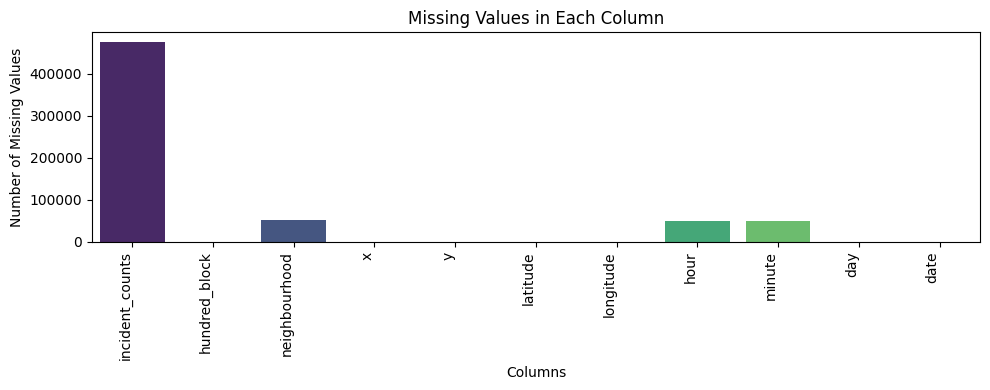

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10, 4))
sns.barplot(x=missing_value.index, y=missing_value.values,palette='viridis')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

### What did you know about your dataset?

After merging the data here’s what we know so far:

Dataset Structure

Total Rows: 474727.

Total Columns: 14

Key Columns:'year', 'month', 'type', 'incident_counts', 'hundred_block',
       'neighbourhood', 'x', 'y', 'latitude', 'longitude', 'hour', 'minute',
       'day', 'date'

Duplicates: 44618 duplicate rows.

Missing index: 'incident_counts', 'hundred_block', 'neighbourhood', 'x', 'y',
       'latitude', 'longitude', 'hour', 'minute', 'day', 'date'

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df_merged.columns

Index(['year', 'month', 'type', 'incident_counts', 'hundred_block',
       'neighbourhood', 'x', 'y', 'latitude', 'longitude', 'hour', 'minute',
       'day', 'date'],
      dtype='object')

In [ ]:
# Dataset Describe
df_merged.describe()

,year,month,incident_counts,x,y,latitude,longitude,hour,minute,day,date
count,474727.000000,474727.000000,0.0,474565.000000,4.745650e+05,474565.000000,474565.000000,425200.000000,425200.000000,474565.000000,474565
mean,2004.366352,6.555340,NaN,441028.018220,4.889023e+06,44.138029,-110.301025,13.721263,16.736047,15.439253,2004-11-11 23:51:07.470209152
min,1999.000000,1.000000,NaN,0.000000,0.000000e+00,0.000000,-124.549757,0.000000,0.000000,1.000000,1999-01-01 00:00:00
25%,2001.000000,4.000000,NaN,489916.530000,5.453572e+06,49.234871,-123.127383,9.000000,0.000000,8.000000,2001-06-06 00:00:00
50%,2004.000000,7.000000,NaN,491477.850000,5.456820e+06,49.264051,-123.107058,15.000000,10.000000,15.000000,2004-05-18 00:00:00
75%,2008.000000,9.000000,NaN,493610.190000,5.458622e+06,49.280300,-123.065646,19.000000,30.000000,23.000000,2008-03-27 00:00:00
max,2013.000000,12.000000,NaN,511303.000000,5.512579e+06,49.755314,0.000000,23.000000,59.000000,31.000000,2011-12-31 00:00:00
std,3.852854,3.408697,NaN,150295.319332,1.665850e+06,15.039271,37.583147,6.785751,18.354675,8.759352,NaN


### Variables Description


**year:**	The year in which the crime incident occurred.

**month:**	The month of the crime occurrence. Useful for detecting seasonality.

**type:**	The type or category of crime (e.g., theft, assault, vandalism).

**incident_counts:**	The number of incidents for a given time and location.

**hundred_block:**	The specific area or block where the crime occurred.
neighbourhood	The neighborhood where the crime took place.

**x, y:**	Spatial coordinates of the crime location.
latitude, longitude	Geographic coordinates (latitude and longitude) for mapping crime locations.

**hour:**	The hour of the day when the crime occurred.

**minute:**The minute of the hour when the crime happened.

**day:**	The day of the month when the crime occurred.

**date:**	The full date of the crime incident (this should be converted to a datetime format for time series analysis).

**Observations & Suggestions**
Time-Based Features

year, month, day, hour, and minute should be **combined into a proper datetime **column using pd.to_datetime().
This will help in trend analysis, seasonality detection, and forecasting.
Spatial Analysis

latitude & longitude can be used for geospatial visualizations (e.g., heatmaps of crime hotspots).
x & y might be projected coordinates; check if they need conversion.
Incident Patterns

type can be analyzed to identify which crimes are more common.
incident_counts can be aggregated over time and location to find high-crime areas.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df_merged.columns:
  print(f"number of unique values in {i} is {df_merged[i].nunique()}")

number of unique values in year is 15
number of unique values in month is 12
number of unique values in type is 9
number of unique values in incident_counts is 0
number of unique values in hundred_block is 20566
number of unique values in neighbourhood is 24
number of unique values in x is 84225
number of unique values in y is 82768
number of unique values in latitude is 89488
number of unique values in longitude is 87190
number of unique values in hour is 24
number of unique values in minute is 60
number of unique values in day is 31
number of unique values in date is 4748


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474727 entries, 0 to 474726
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   year             474727 non-null  int64         
 1   month            474727 non-null  int64         
 2   type             474727 non-null  object        
 3   incident_counts  0 non-null       float64       
 4   hundred_block    474552 non-null  object        
 5   neighbourhood    423074 non-null  object        
 6   x                474565 non-null  float64       
 7   y                474565 non-null  float64       
 8   latitude         474565 non-null  float64       
 9   longitude        474565 non-null  float64       
 10  hour             425200 non-null  float64       
 11  minute           425200 non-null  float64       
 12  day              474565 non-null  float64       
 13  date             474565 non-null  datetime64[ns]
dtypes: datetime64[ns](1)

In [ ]:
df_merged.head()

,year,month,type,incident_counts,hundred_block,neighbourhood,x,y,latitude,longitude,hour,minute,day,date
0,1999,1,Break and Enter Commercial,NaN,10XX CAMBIE ST,Central Business District,491355.97,5458080.85,49.275424,-123.118837,19.0,0.0,22.0,1999-01-22
1,1999,1,Break and Enter Commercial,NaN,10XX COMMERCIAL DR,Grandview-Woodland,494946.62,5458085.11,49.275502,-123.069474,2.0,50.0,14.0,1999-01-14
2,1999,1,Break and Enter Commercial,NaN,10XX E 54TH AVE,Sunset,493804.81,5451982.71,49.220599,-123.085077,21.0,0.0,16.0,1999-01-16
3,1999,1,Break and Enter Commercial,NaN,10XX E GEORGIA ST,Strathcona,494077.84,5458386.10,49.278202,-123.081422,23.0,19.0,1.0,1999-01-01
4,1999,1,Break and Enter Commercial,NaN,10XX E GEORGIA ST,Strathcona,494077.84,5458386.10,49.278202,-123.081422,18.0,12.0,18.0,1999-01-18


In [ ]:
df_merged=df_merged.drop(columns=['date'])

In [ ]:
#1. Convert Date Components to a Single datetime Column
# Issue:
# The dataset has year, month, day, hour, and minute stored separately.
# Solution:
# Combine them into a proper datetime column using pd.to_datetime():
df_merged['datetime'] = pd.to_datetime(df_merged[['year', 'month', 'day', 'hour', 'minute']])
#new column "datatime"created
#Drop the original columns after conversion if they are no longer needed.
df_merged=df_merged.drop(columns=['year', 'month', 'day', 'hour', 'minute'])


In [ ]:
df_merged.head()

,type,incident_counts,hundred_block,neighbourhood,x,y,latitude,longitude,datetime
0,Break and Enter Commercial,NaN,10XX CAMBIE ST,Central Business District,491355.97,5458080.85,49.275424,-123.118837,1999-01-22 19:00:00
1,Break and Enter Commercial,NaN,10XX COMMERCIAL DR,Grandview-Woodland,494946.62,5458085.11,49.275502,-123.069474,1999-01-14 02:50:00
2,Break and Enter Commercial,NaN,10XX E 54TH AVE,Sunset,493804.81,5451982.71,49.220599,-123.085077,1999-01-16 21:00:00
3,Break and Enter Commercial,NaN,10XX E GEORGIA ST,Strathcona,494077.84,5458386.10,49.278202,-123.081422,1999-01-01 23:19:00
4,Break and Enter Commercial,NaN,10XX E GEORGIA ST,Strathcona,494077.84,5458386.10,49.278202,-123.081422,1999-01-18 18:12:00


**OR**

Since you already have a date column, we should check its format and ensure it's properly recognized as a datetime type.

Merge date with Time Components (if separate hour & minute exist)

Then, drop unnecessary columns:df.drop(columns=['date', 'hour', 'minute'], inplace=True)

In [ ]:
#df_merged['datetime1'] = df_merged['date'] + pd.to_timedelta(df_merged['hour'], unit='h') + pd.to_timedelta(df_merged['minute'], unit='m')

In [ ]:
#df_merged.head()

In [ ]:
#2.Handle Missing Values
# Issue:
# Some columns might have NaN values.
# Solution:
# Check missing values:
missing_value1=df_merged.isnull().sum(0)
missing_value1=missing_value[missing_value>0]
missing_value1.index

Index(['incident_counts', 'hundred_block', 'neighbourhood', 'x', 'y',
       'latitude', 'longitude', 'hour', 'minute', 'day', 'date'],
      dtype='object')

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474727 entries, 0 to 474726
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   type             474727 non-null  object        
 1   incident_counts  0 non-null       float64       
 2   hundred_block    474552 non-null  object        
 3   neighbourhood    423074 non-null  object        
 4   x                474565 non-null  float64       
 5   y                474565 non-null  float64       
 6   latitude         474565 non-null  float64       
 7   longitude        474565 non-null  float64       
 8   datetime         425200 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 32.6+ MB


In [ ]:
#  incident_counts (All Missing)
# Since incident_counts has 0 non-null values, it provides no useful information.
# Solution: Drop the column.
df_merged=df_merged.drop(columns=['incident_counts'])

In [ ]:
# impute
for col in df_merged.columns:
    if df_merged[col].dtype == 'object':  # Categorical/String
        df_merged[col] = df_merged[col].fillna(df_merged[col].mode()[0])
    elif df_merged[col].dtype in ['float64', 'int64']:  # Numeric
        df_merged[col] = df_merged[col].fillna(df_merged[col].median())
    elif pd.api.types.is_datetime64_any_dtype(df_merged[col]):  # Datetime
        df_merged[col] = df_merged[col].fillna(df_merged[col].mode()[0])

In [ ]:
df_merged.isnull().sum()

,0
type,0
hundred_block,0
neighbourhood,0
x,0
y,0
latitude,0
longitude,0
datetime,0


In [ ]:
# 3. Aggregate Crime Data Over Time
# Issue:
# Crime incidents might be recorded at different time granularities.
# Solution:
# Resample data to a monthly level:
df_merged.set_index('datetime', inplace=True)# set "datetime" as index
#Now, the index is a datetime index, allowing us to use time-based operations like resampling


In [ ]:
df_merged.head(5)

,type,hundred_block,neighbourhood,x,y,latitude,longitude
datetime,,,,,,,
1999-01-22 19:00:00,Break and Enter Commercial,10XX CAMBIE ST,Central Business District,491355.97,5458080.85,49.275424,-123.118837
1999-01-14 02:50:00,Break and Enter Commercial,10XX COMMERCIAL DR,Grandview-Woodland,494946.62,5458085.11,49.275502,-123.069474
1999-01-16 21:00:00,Break and Enter Commercial,10XX E 54TH AVE,Sunset,493804.81,5451982.71,49.220599,-123.085077
1999-01-01 23:19:00,Break and Enter Commercial,10XX E GEORGIA ST,Strathcona,494077.84,5458386.10,49.278202,-123.081422
1999-01-18 18:12:00,Break and Enter Commercial,10XX E GEORGIA ST,Strathcona,494077.84,5458386.10,49.278202,-123.081422


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 474727 entries, 1999-01-22 19:00:00 to 2007-06-15 21:00:00
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   type           474727 non-null  object 
 1   hundred_block  474727 non-null  object 
 2   neighbourhood  474727 non-null  object 
 3   x              474727 non-null  float64
 4   y              474727 non-null  float64
 5   latitude       474727 non-null  float64
 6   longitude      474727 non-null  float64
dtypes: float64(4), object(3)
memory usage: 29.0+ MB


In [ ]:
df_merged.columns

Index(['type', 'hundred_block', 'neighbourhood', 'x', 'y', 'latitude',
       'longitude'],
      dtype='object')

In [ ]:
#group by month
agg_funcs = {}
for col in df_merged.columns:
    if df_merged[col].dtype == 'object':  # Categorical columns
        agg_funcs[col] = 'first'  # Or use mode()
    elif df_merged[col].dtype in ['int64', 'float64']:  # Numeric columns
        agg_funcs[col] = 'sum'  # Or 'mean'
    elif pd.api.types.is_datetime64_any_dtype(df_merged[col]):  # Datetime columns
        agg_funcs[col] = 'first'  # Or 'min' for earliest date

df_merged_monthly = df_merged.resample('M').agg(agg_funcs)
# Group data by month-end using .resample('M').
# Aggregate values within each month using .sum().

<ipython-input-48-91d056f92a76>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_merged_monthly = df_merged.resample('M').agg(agg_funcs)


In [ ]:
df_merged_monthly.head()

,type,hundred_block,neighbourhood,x,y,latitude,longitude
datetime,,,,,,,
1999-01-31,Break and Enter Commercial,64XX VICTORIA DR,Victoria-Fraserview,1.996948e+09,2.214327e+10,199909.109454,-499574.549607
1999-02-28,Break and Enter Commercial,26XX WATSON ST,Mount Pleasant,1.608514e+09,1.783224e+10,160989.208031,-402314.294620
1999-03-31,Break and Enter Commercial,1XX W PENDER ST,Central Business District,1.778050e+09,1.971523e+10,177988.758586,-444790.042268
1999-04-30,Break and Enter Residential/Other,48XX SOPHIA ST,Riley Park,1.954354e+09,2.167398e+10,195672.323898,-488990.960791
1999-05-31,Break and Enter Residential/Other,35XX W BROADWAY AVE,Kitsilano,2.143155e+09,2.376399e+10,214540.963017,-536137.066221


In [ ]:
# 4. Handle Duplicates
# Issue:
# Some rows may be duplicate records.
# Solution:
# Remove duplicate rows
df_merged_monthly.duplicated().sum()

np.int64(0)

In [ ]:
df_merged_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 1999-01-31 to 2011-12-31
Freq: ME
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           156 non-null    object 
 1   hundred_block  156 non-null    object 
 2   neighbourhood  156 non-null    object 
 3   x              156 non-null    float64
 4   y              156 non-null    float64
 5   latitude       156 non-null    float64
 6   longitude      156 non-null    float64
dtypes: float64(4), object(3)
memory usage: 9.8+ KB


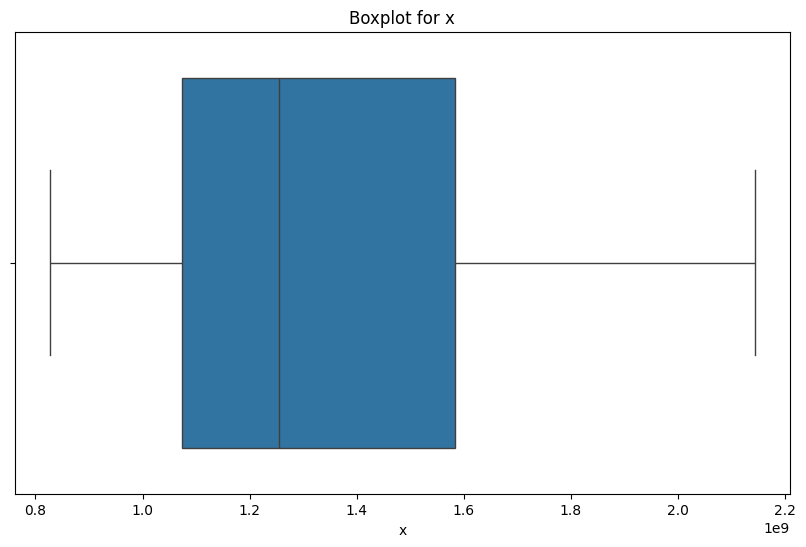

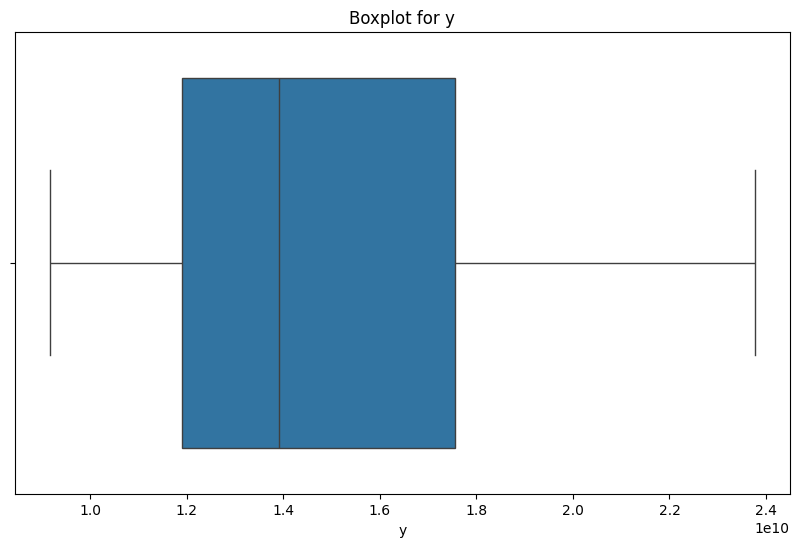

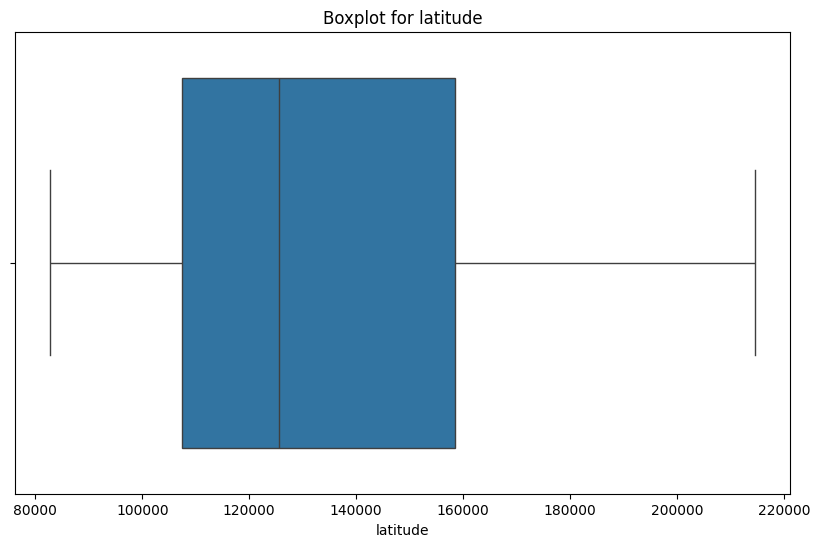

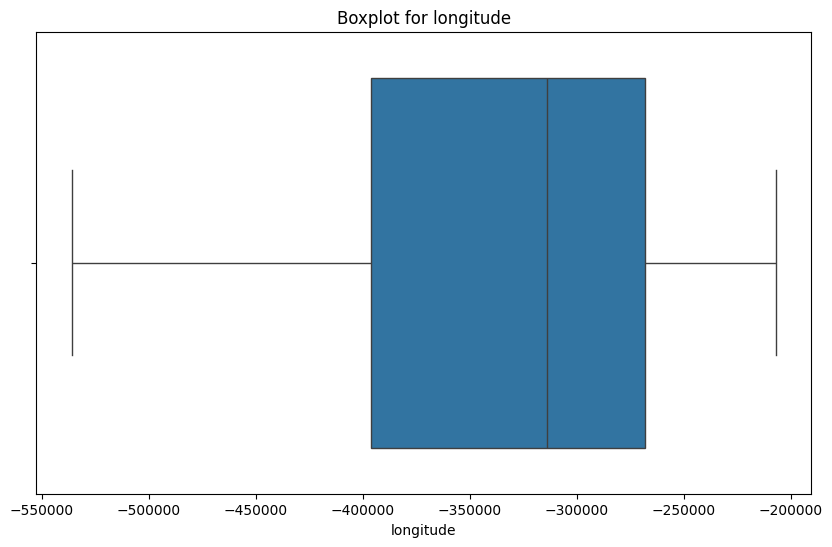

In [ ]:
# Handling Outliers & Outlier treatments
numerical_features = df_merged_monthly.select_dtypes(exclude='object').columns
# Plotting boxplots to visually inspect for outliers
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_merged_monthly[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()


In [ ]:
#Encode Categorical Variables
df_merged_monthly.columns

Index(['type', 'hundred_block', 'neighbourhood', 'x', 'y', 'latitude',
       'longitude'],
      dtype='object')

In [ ]:
# 5. Remove Unnecessary Columns
# Issue:
# x & y coordinates might not be useful if latitude & longitude are available.
# Solution:
# Drop x & y if redundant:
df_merged_monthly=df_merged_monthly.drop(columns=['x', 'y'])

In [ ]:
# 6. Encode Categorical Variables
# Issue:
# type, neighbourhood, and hundred_block are categorical.
# Solution:
# Convert them into numerical format using:
# Identify categorical columns (object dtype)
categorical_cols = df_merged_monthly.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding dynamically
df_merged_monthly_encoded = pd.get_dummies(df_merged_monthly, columns=categorical_cols, drop_first=True)

#print(df_merged_monthly_encoded.head())  # Check the transformed DataFrame

In [ ]:
print(type(df_merged_monthly_encoded))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
df_merged_monthly_encoded.head()

,latitude,longitude,type_Break and Enter Residential/Other,type_Mischief,type_Theft from Vehicle,type_Theft of Bicycle,hundred_block_10XX BEACH AVE,hundred_block_10XX E 28TH AVE,hundred_block_10XX E 8TH AVE,hundred_block_10XX GRANVILLE ST,...,neighbourhood_Oakridge,neighbourhood_Renfrew-Collingwood,neighbourhood_Riley Park,neighbourhood_Shaughnessy,neighbourhood_South Cambie,neighbourhood_Strathcona,neighbourhood_Sunset,neighbourhood_Victoria-Fraserview,neighbourhood_West End,neighbourhood_West Point Grey
datetime,,,,,,,,,,,,,,,,,,,,,
1999-01-31,199909.109454,-499574.549607,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1999-02-28,160989.208031,-402314.294620,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1999-03-31,177988.758586,-444790.042268,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1999-04-30,195672.323898,-488990.960791,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1999-05-31,214540.963017,-536137.066221,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_merged_monthly_encoded.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 1999-01-31 to 2011-12-31
Freq: ME
Columns: 180 entries, latitude to neighbourhood_West Point Grey
dtypes: bool(178), float64(2)
memory usage: 30.8 KB


In [ ]:
df_merged_monthly_encoded=df_merged_monthly_encoded.astype(int)

In [ ]:
df_merged_monthly_encoded.head()

,latitude,longitude,type_Break and Enter Residential/Other,type_Mischief,type_Theft from Vehicle,type_Theft of Bicycle,hundred_block_10XX BEACH AVE,hundred_block_10XX E 28TH AVE,hundred_block_10XX E 8TH AVE,hundred_block_10XX GRANVILLE ST,...,neighbourhood_Oakridge,neighbourhood_Renfrew-Collingwood,neighbourhood_Riley Park,neighbourhood_Shaughnessy,neighbourhood_South Cambie,neighbourhood_Strathcona,neighbourhood_Sunset,neighbourhood_Victoria-Fraserview,neighbourhood_West End,neighbourhood_West Point Grey
datetime,,,,,,,,,,,,,,,,,,,,,
1999-01-31,199909,-499574,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1999-02-28,160989,-402314,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999-03-31,177988,-444790,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999-04-30,195672,-488990,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1999-05-31,214540,-536137,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 7. Scaling the Whole Dataset (Including Encoded Features)
# Since all categorical features have been converted to numerical format, you can scale all columns except datetime.
from sklearn.preprocessing import MinMaxScaler

# Exclude datetime column
cols_to_scale = df_merged_monthly_encoded.columns.difference(['datetime'])

# Initialize and apply MinMaxScaler
scaler = MinMaxScaler()
df_merged_monthly_encoded_scaled = scaler.fit_transform(df_merged_monthly_encoded[cols_to_scale])

In [ ]:
#data in form of NP ARRAY
df_merged_monthly_encoded_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#data in form of DATAFRAME
df_merged_monthly_encoded_scaled = pd.DataFrame(df_merged_monthly_encoded_scaled,columns=df_merged_monthly_encoded.columns)

In [ ]:
df_merged_monthly_encoded_scaled.head()

,latitude,longitude,type_Break and Enter Residential/Other,type_Mischief,type_Theft from Vehicle,type_Theft of Bicycle,hundred_block_10XX BEACH AVE,hundred_block_10XX E 28TH AVE,hundred_block_10XX E 8TH AVE,hundred_block_10XX GRANVILLE ST,...,neighbourhood_Oakridge,neighbourhood_Renfrew-Collingwood,neighbourhood_Riley Park,neighbourhood_Shaughnessy,neighbourhood_South Cambie,neighbourhood_Strathcona,neighbourhood_Sunset,neighbourhood_Victoria-Fraserview,neighbourhood_West End,neighbourhood_West Point Grey
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### What all manipulations have you done and insights you found?

1. Convert Date Components to a Single datetime Column.

2.Handle Missing Values

3. Aggregate Crime Data Over Time

4.group by month

5. Handle Duplicates

6. Remove Unnecessary Columns

7. Encode Categorical Variables

8. Scaling the Whole Dataset (Including Encoded Features)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1=COUNT PLOT-incident typye
For visualization, you do not need scaling or encoding. You can use the original data, as most plots (e.g., time series, bar charts, maps) work with categorical and numerical values directly.

In [ ]:
# Chart - 1 visualization code
df_merged_monthly.head()

,type,hundred_block,neighbourhood,latitude,longitude
datetime,,,,,
1999-01-31,Break and Enter Commercial,64XX VICTORIA DR,Victoria-Fraserview,199909.109454,-499574.549607
1999-02-28,Break and Enter Commercial,26XX WATSON ST,Mount Pleasant,160989.208031,-402314.294620
1999-03-31,Break and Enter Commercial,1XX W PENDER ST,Central Business District,177988.758586,-444790.042268
1999-04-30,Break and Enter Residential/Other,48XX SOPHIA ST,Riley Park,195672.323898,-488990.960791
1999-05-31,Break and Enter Residential/Other,35XX W BROADWAY AVE,Kitsilano,214540.963017,-536137.066221


In [ ]:
df_merged_monthly.columns

Index(['type', 'hundred_block', 'neighbourhood', 'latitude', 'longitude'], dtype='object')

In [ ]:
df_merged_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 1999-01-31 to 2011-12-31
Freq: ME
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           156 non-null    object 
 1   hundred_block  156 non-null    object 
 2   neighbourhood  156 non-null    object 
 3   latitude       156 non-null    float64
 4   longitude      156 non-null    float64
dtypes: float64(2), object(3)
memory usage: 7.3+ KB


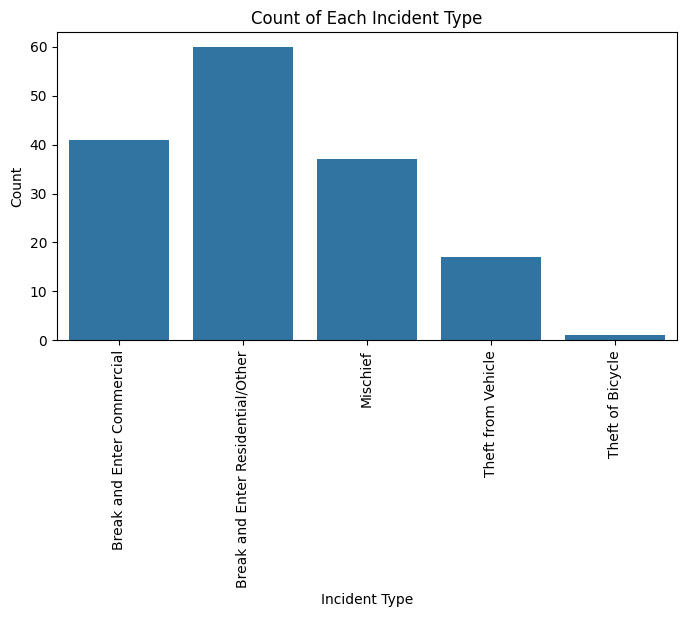

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='type', data=df_merged_monthly)
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.title('Count of Each Incident Type')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

for visualizing the frequency of categorical data

##### 2. What is/are the insight(s) found from the chart?

break and enter resident has more theft

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive Business Impact:

Strategic Resource Allocation: Understanding the frequency and distribution of these incident types enables businesses to allocate resources more effectively. For instance, if 'Theft' incidents are predominant, enhancing security measures in vulnerable areas can mitigate risks.​

Enhanced Risk Assessment: Identifying prevalent crime types allows for more accurate risk assessments, leading to better insurance planning and contingency strategies.​

Informed Decision-Making: Data-driven insights facilitate proactive measures, such as employee training programs to handle specific incidents, thereby improving overall safety and operational continuity.​

2. Potential Negative Implications:

Misinterpretation of Data: If the dataset is limited or lacks context, drawing conclusions may lead to misguided strategies. For example, overestimating the threat of 'Robbery' based on insufficient data could result in unnecessary expenditures.​

Resource Misallocation: Focusing solely on certain incident types without a comprehensive analysis might neglect other critical areas, leading to vulnerabilities elsewhere.

#### Chart - 2=scatter-latittude and longitude

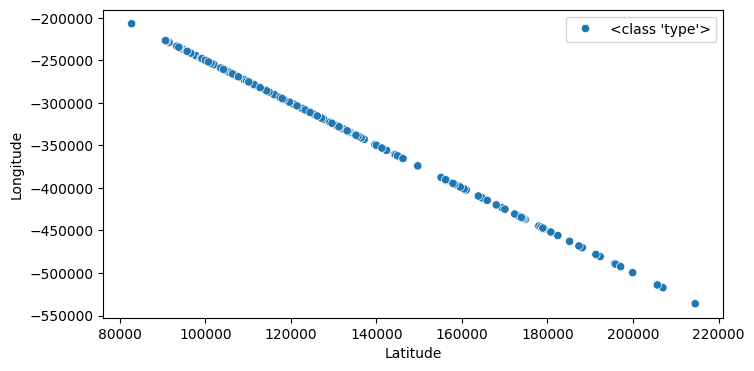

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df_merged_monthly_encoded['latitude'], y=df_merged_monthly_encoded['longitude'], hue=type)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()


##### 1. Why did you pick the specific chart?

Because it shows relation between longitude and latitide

##### 2. What is/are the insight(s) found from the chart?

Latittude and Longitude are inversely to each other

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact

If a business is located outside high-crime zones, it can attract more customers who prioritize safety.

This information can guide real estate decisions (e.g., selecting safer locations for new business ventures).

Businesses in safer areas may see higher foot traffic and customer retention.

Negative Growth Indicators

If a business is within a high-crime area, customers may feel unsafe, leading to reduced visits and sales.

Businesses in crime hotspots might face higher security costs and potential insurance premium increases.

Certain crime-prone areas may discourage investors and partnerships, impacting long-term growth.

#### Chart - 3-bar plot-neighbourhood

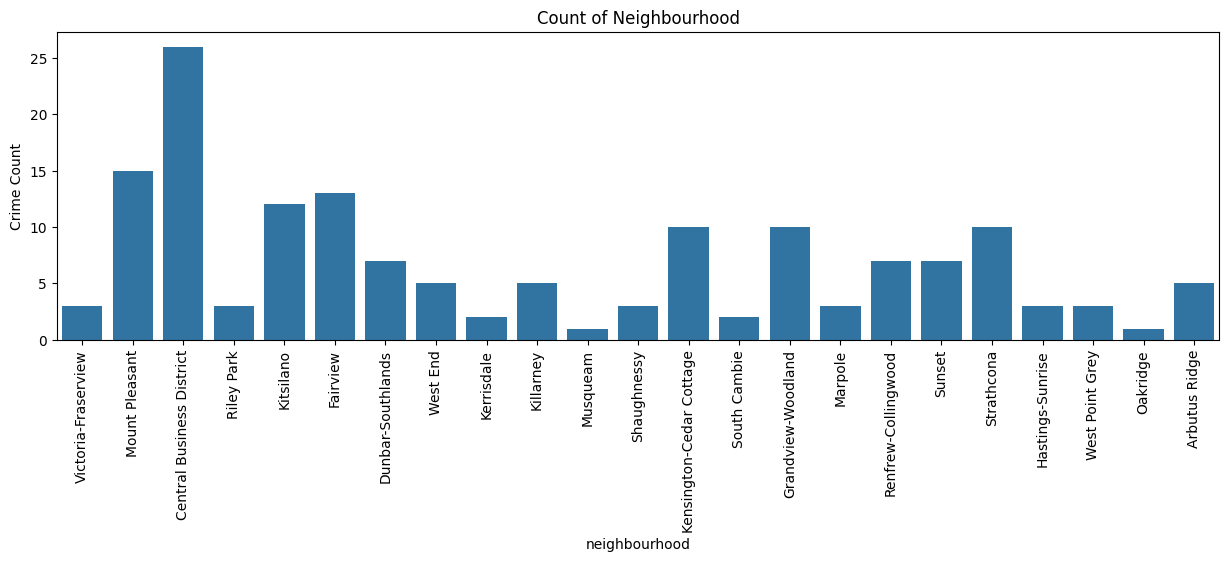

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(15, 4))
sns.countplot(x='neighbourhood', data=df_merged_monthly)
plt.xlabel('neighbourhood')
plt.ylabel('Crime Count')
plt.title('Count of Neighbourhood')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Counts no of crime occurs near to this location.

##### 2. What is/are the insight(s) found from the chart?

Central Business District having most crime occurs,and Musqueam	1,Oakridge has least crime count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Businesses in low-crime neighbourhoods are more likely to attract customers and investors.

Such areas provide a safer environment, encouraging higher foot traffic and economic stability.

Real estate and retail businesses can use this data to strategically choose locations.

Negative Growth Indicators:

High-crime neighbourhoods may face reduced customer visits, leading to lower sales.

Potential security concerns could increase operational costs (e.g., hiring security personnel, installing surveillance).

Real estate prices may decline in crime-heavy areas, affecting property investments.

#### Chart - 4-count plot

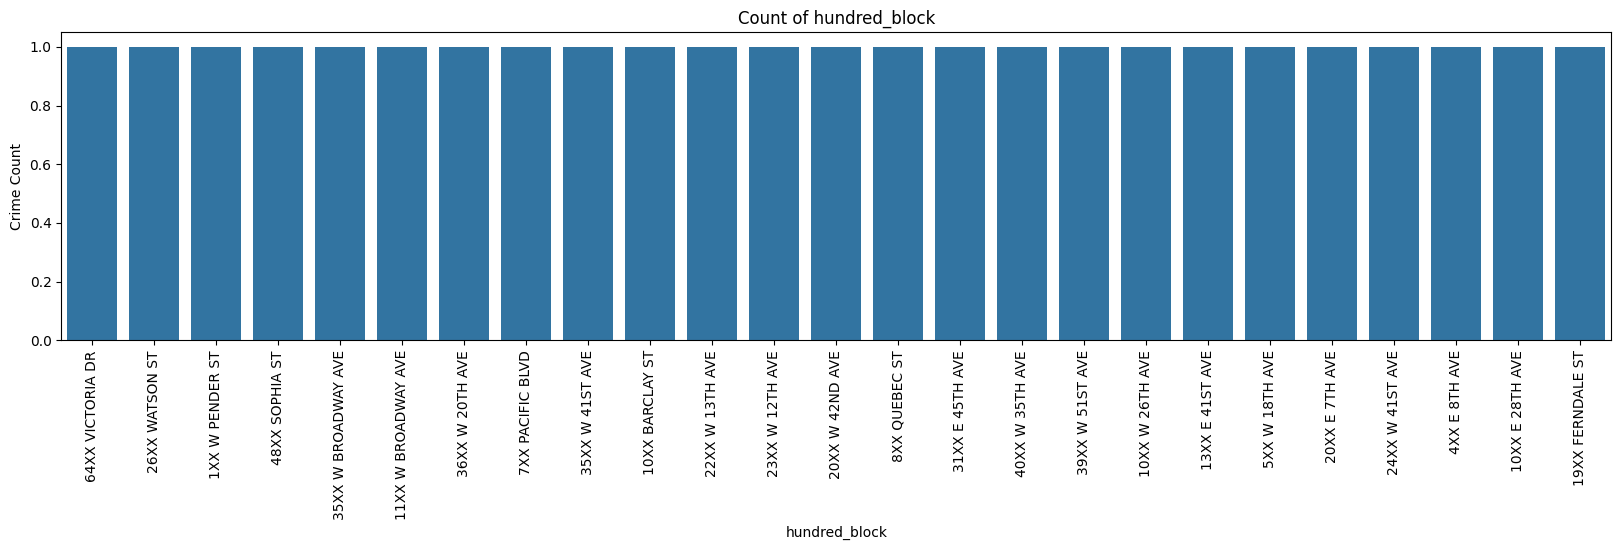

In [ ]:
# Chart - 4 visualization code
top25=df_merged_monthly['hundred_block'].head(25)
plt.figure(figsize=(20, 4))
sns.countplot(x=top25, data=df_merged_monthly)
plt.xlabel('hundred_block')
plt.ylabel('Crime Count')
plt.title('Count of hundred_block')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Categorical Data Representation

hundred_block is a categorical variable (street names), and a count plot is best suited for showing how often each category appears.

Clear Comparison

It allows for an easy comparison of crime frequencies across the top 25 street blocks.

The bars help visualize trends (which streets have significantly higher crime counts).

##### 2. What is/are the insight(s) found from the chart?

Positive Business Impact:

Businesses can use this data to identify safer areas for expansion.

If a high-crime street is a business location, increased security can improve safety and attract more customers.

Local authorities may use this information to allocate police patrols more effectively.

Negative Growth Indicators:

If a business is located in a high-crime block, customers may avoid visiting, leading to lower sales.

Higher security costs (e.g., surveillance, guards) may reduce profitability.

Property values in high-crime areas might decline, affecting real estate investments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If businesses use the insights to avoid risky areas and improve security, they can benefit positively.

However, if crime rates remain high, businesses in those areas may suffer lower revenue, higher costs, and reduced investment opportunities.

#### Chart - 5-Pie chart-type

<Axes: ylabel='count'>

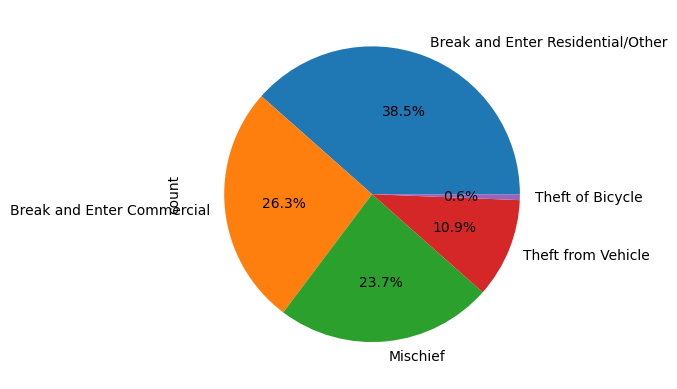

In [ ]:
# Chart - 5 visualization code
df_merged_monthly['type'].value_counts().plot(kind='pie',autopct='%1.1f%%')

##### 1. Why did you pick the specific chart?

A pie chart is chosen because:

Proportional Representation

It visually shows the percentage distribution of different crime types.

Helps in quickly identifying the most common crime type.

Easy Comparison

The autopct='%1.1f%%' adds percentage values, making it clear which crime types dominate.

Businesses or policymakers can prioritize security measures based on crime prevalence.

##### 2. What is/are the insight(s) found from the chart?

Dominant Crime Types

The largest slice of the pie represents the most frequent crime, showing where law enforcement and businesses should focus their efforts.

If one crime type dominates, targeted policies (e.g., theft prevention, fraud monitoring) can be implemented.

Business Impact (Positive & Negative)

Positive:

Businesses in areas with low violent crime rates can attract more customers.

Security services can offer tailored solutions to address the most common crime types.

Negative:

If property crimes (e.g., theft, vandalism) are high, businesses may suffer financial losses.

Higher crime rates may lead to increased security costs and lower foot traffic.

Policy & Security Adjustments

Local authorities can increase patrols in high-crime areas.

Businesses can install security cameras or hire security if theft-related crimes are high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If businesses use the insights to proactively improve security and choose better locations, they can positively impact growth.

However, if crime rates remain unchecked, businesses may face higher costs, lower sales, and reduced investments.

#### Chart - 6-Heatmaap

<Axes: >

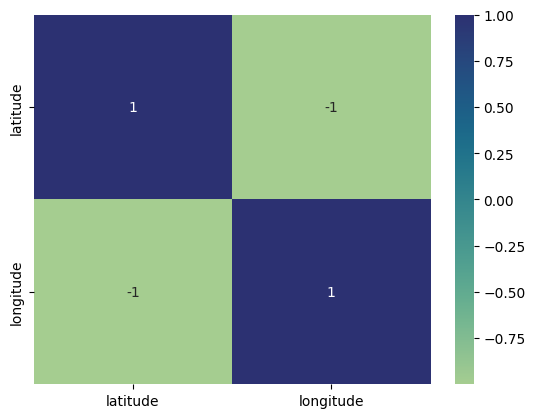

In [ ]:
# Chart - 6 visualization code
numeric_col=df_merged_monthly.select_dtypes(include=['int64','float64'])

sns.heatmap(numeric_col.corr(),cmap='crest',annot=True)

##### 1. Why did you pick the specific chart?

Correlation Analysis 📊

A heatmap is ideal for visualizing the correlation between numeric variables.

It helps identify relationships between features in your dataset.

Color Representation 🎨

The color gradient makes it easy to spot strong (darker shades) and weak (lighter shades) correlations.

Annotation for Clarity 🔢

The annot=True parameter displays correlation values directly on the chart, making interpretation easier.

##### 2. What is/are the insight(s) found from the chart?

1. Correlation Between Longitude & Latitude
If longitude and latitude are strongly correlated (positive or negative), it suggests that your data points follow a specific geographical pattern (e.g., a linear or diagonal distribution on a map).

If no strong correlation, your locations might be more randomly distributed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Location-Based Decision Making

If sales, customer traffic, or revenue correlate with certain locations, businesses can prioritize those areas for expansion, marketing, or investment.

Example: If a retail company finds high sales in areas with specific latitude-longitude ranges, they can open more stores in similar locations.

✅ Targeted Marketing Strategies

If customer behavior (e.g., purchases, complaints, or preferences) varies by location, businesses can customize promotions.

Example: If sales drop at higher latitudes, businesses can adjust product offerings for different climates.

✅ Operational Efficiency

Businesses can optimize delivery routes by analyzing correlations between geographical features and delivery times.

Example: If delays are correlated with certain longitude/latitude locations, the company can adjust logistics or partner with local providers.

#### Chart - 7-top 10 hundred_blocl

<Axes: ylabel='count'>

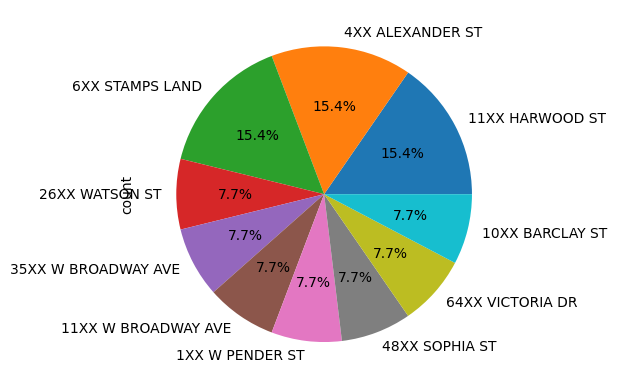

In [ ]:
# Chart - 7 visualization code
df_merged_monthly['hundred_block'].value_counts().head(10).plot(kind='pie',autopct='%1.1f%%')

##### 1. Why did you pick the specific chart?

✅ Show Proportions – It helps visualize how different categories contribute to the whole.
✅ Identify Dominant Categories – If a few values take up most of the pie, they are the most frequent.
✅ Compare Top Categories – The chart makes it easy to compare the share of each category.

##### 2. What is/are the insight(s) found from the chart?

1️⃣ Identifying High-Activity Areas
If a few blocks dominate the chart, those locations have the most recorded incidents.

Businesses or law enforcement can prioritize these areas for better security, traffic control, or services.

2️⃣ Understanding Location Concentration
If one or two slices take up most of the pie, incidents are heavily concentrated in a few locations.

If slices are evenly distributed, incidents are spread across many areas.

3️⃣ Potential Business or Safety Actions
If certain locations have higher incident rates, city officials or businesses may:
✅ Increase policing or security measures.
✅ Improve infrastructure in high-traffic areas.
✅ Analyze whether specific events or times impact those locations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1️⃣ Optimizing Business Locations 📍
If certain hundred_block areas have high activity, businesses can expand or relocate there.

Example: A retail store or food chain can open a new outlet in a high-traffic area for better footfall.

2️⃣ Better Resource Allocation 📊
Businesses (like delivery services or logistics) can optimize routes by prioritizing locations with frequent activity.

Example: A food delivery service can deploy more riders in busy blocks to reduce wait times.

3️⃣ Targeted Marketing 🎯
If a block has more recorded activity (e.g., high foot traffic), businesses can run promotions there.

Example: A fashion brand can place billboards in high-density areas to attract more customers.

Are There Insights That Could Lead to Negative Growth? 🚨
Yes, some insights may indicate potential risks for businesses:

1️⃣ High Crime Areas May Reduce Customer Traffic 🚔
If certain hundred_block locations have high incident rates (e.g., theft, vandalism), customers might avoid those areas.

Example: A shopping mall in a crime-prone area might see fewer visitors, leading to lower sales.

2️⃣ Operational Costs May Increase 💰
If high-activity areas also have traffic congestion or security concerns, businesses may spend more on safety and logistics.

Example: A delivery company may need extra security or alternative routes to avoid theft-prone locations.

3️⃣ Business Reputation Risk 📉
If a business operates in an area with negative public perception, customers might associate it with unsafe conditions.

#### Chart - 8-line chart-group by year incident type

<Figure size 2000x1000 with 0 Axes>

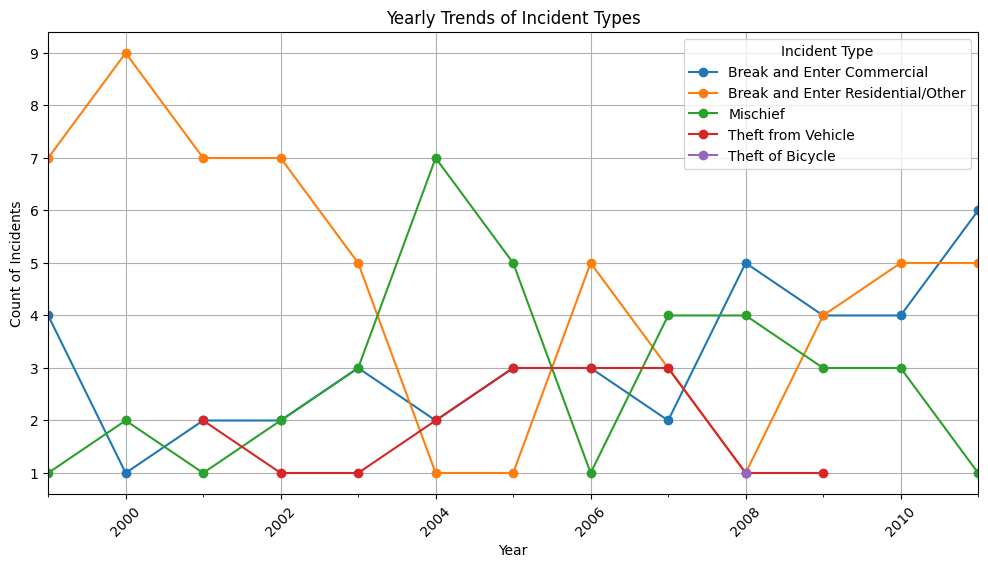

In [ ]:
# Chart - 8 visualization code
# Ensure datetime index
df_merged_monthly.index = pd.to_datetime(df_merged_monthly.index)

# Group by month and type
monthly_counts = df_merged_monthly.groupby([df_merged_monthly.index.to_period('Y'), 'type']).size().unstack()

# Plot
plt.figure(figsize=(20, 10))
monthly_counts.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Yearly Trends of Incident Types")
plt.xlabel("Year")
plt.ylabel("Count of Incidents")
plt.xticks(rotation=45)
plt.legend(title="Incident Type")
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is the best choice for this type of data because:

✅ Shows Trends Over Time ⏳

Since your data is grouped by month, a line chart helps visualize how incidents change over time.

Example: If theft incidents are increasing over months, it could indicate a rising crime trend.

✅ Comparing Multiple Categories Easily

Each incident type gets a separate line, making it easy to see which types are increasing or decreasing.

Example: If "assault" cases drop but "fraud" cases rise, authorities can adjust their focus.

✅ Identifies Seasonal Patterns 🌦️

Some incident types may spike in certain months (e.g., more thefts in holiday seasons).

Helps businesses or law enforcement prepare for peak times

##### 2. What is/are the insight(s) found from the chart?

1️⃣ Identifying Trends & Seasonality ⏳
If certain incident types increase in specific months, it may indicate a seasonal pattern.

Example:

Theft cases spike in December → Possibly due to holiday shopping & crowded places.

Fraud cases increase in tax season → People may fall for financial scams.

2️⃣ Rising or Declining Incident Types 🚨
If a specific type is consistently rising, it could indicate an emerging issue that needs attention.

Example:

Increase in assaults → May signal growing safety concerns in certain areas.

Decline in vandalism → Could mean improved law enforcement or security measures.

3️⃣ Comparing Incident Types Over Time
If one incident type is always higher than others, it might be the dominant concern.

Example:

Traffic accidents are always the highest → Could indicate poor road conditions or increasing vehicle use.

Fraud cases surpass theft in some months → Could be linked to online scams or financial frauds.

4️⃣ Sudden Spikes or Drops 📊
A sharp increase could mean an external factor influenced incidents (e.g., new policies, social events, or crises).

Example:

Crime rates dropped in a specific month → Maybe due to new law enforcement measures.

Spike in a particular incident type → Could be linked to a local festival or economic downturn.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1️⃣ Strategic Business Planning 📍
Identifying safe vs. high-risk months helps businesses adjust their operations.

Example:

A retail store may increase security measures in months where theft is high.

Restaurants and nightlife businesses may hire more security personnel if assault cases rise.

2️⃣ Better Marketing & Customer Engagement 🎯
Understanding incident trends allows businesses to adjust marketing efforts accordingly.

Example:

If fraud cases increase during the holiday season, e-commerce platforms can educate customers on avoiding scams.

If vandalism peaks during festivals, brands can invest in temporary security solutions for outdoor ads.

3️⃣ Optimized Insurance & Risk Management 📊
Insurance companies and businesses can adjust premiums based on risk levels.

Example:

A delivery service may adjust routes in high-theft months to minimize losses.

Property owners may increase insurance coverage for months with high burglary cases.

#### Chart - 9-box plot type vs latitude

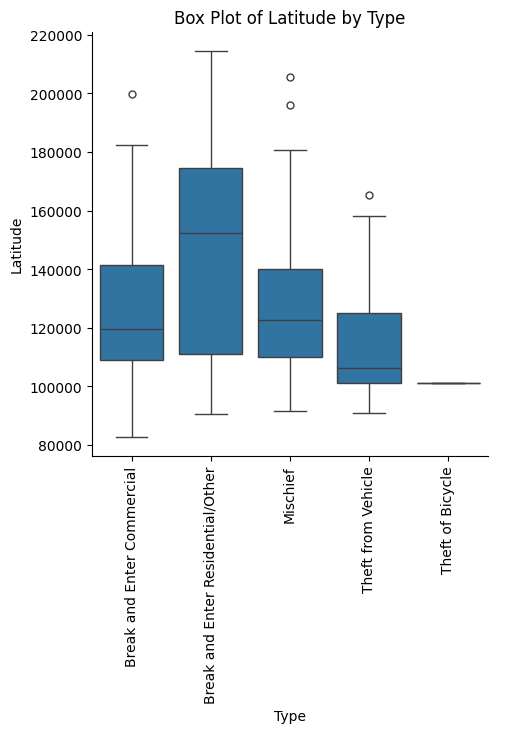

In [ ]:
# Chart - 9 visualization code
sns.catplot(x='type', y='latitude', data=df_merged_monthly, kind='box')
plt.title('Box Plot of Latitude by Type')
plt.xlabel('Type')
plt.ylabel('Latitude')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

✅ Shows Distribution & Spread

Helps understand how latitude values vary for different incident types.

Example: Some incidents may only happen in certain latitude ranges (e.g., near coastal areas).

✅ Identifies Outliers 🔴

Box plots highlight outliers that may indicate unusual locations for specific incidents.

Example: If most assault cases occur in central locations, but some outliers appear far away, those areas might need extra attention.

✅ Compares Multiple Categories Easily

Allows direct comparison of how different incident types are distributed geographically.

##### 2. What is/are the insight(s) found from the chart?

1️⃣ Incident Types Have Distinct Latitude Ranges 📍
Some types of incidents are concentrated within a specific latitude range, while others are more spread out.

Example:

Theft & Assault may be more concentrated in central areas (narrower latitude range).

Traffic Accidents might be spread across a wider range (larger latitude box).

2️⃣ Identifying High-Risk Zones 🚨
If a particular incident type consistently appears in a specific latitude band, that area might be a hotspot for such incidents.

Example:

A cluster of fraud cases at a particular latitude could indicate a scam-prone area (e.g., near financial districts).

Vandalism incidents in specific latitudes may point to neighborhoods with less surveillance.

3️⃣ Outliers Indicate Unusual Incidents ⚠️
Outliers represent incidents happening outside the usual latitude range for that type.

Example:

A robbery far from the city center could indicate a one-off event or a new emerging pattern.

A high-latitude spike in vehicle thefts might mean thieves are targeting less-patrolled areas.

4️⃣ Comparing Geographic Spread of Different Incident Types 🌎
Incident types with large IQR (Interquartile Range) occur across a broad area.

Incident types with a small IQR are more localized.

Example:

Traffic collisions may be widespread (large IQR).

Drug-related incidents may be concentrated in specific districts (small IQR).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Impact: Helps in business location planning, crime prevention, and marketing strategy

❌ Negative Impact: Could lead to declining foot traffic, higher security costs, and reputational risks.

#### Chart - 10-violin neighbourhood vs longitude

<Figure size 2000x2000 with 0 Axes>

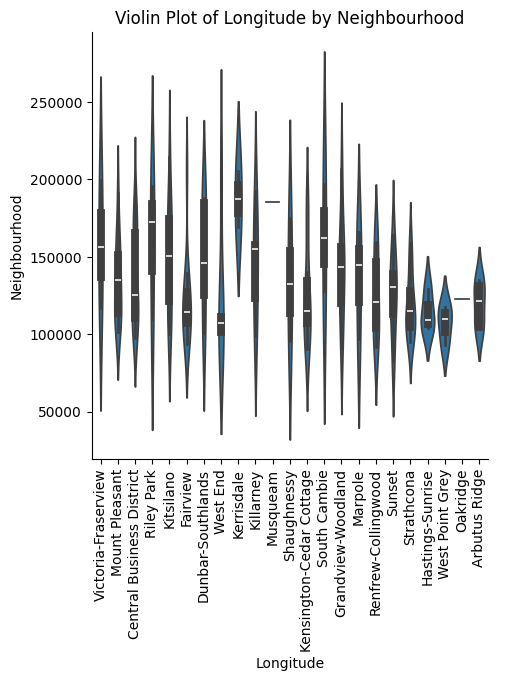

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(20, 20))
sns.catplot(x='neighbourhood', y='latitude', data=df_merged_monthly, kind='violin')
plt.title('Violin Plot of Longitude by Neighbourhood')
plt.xlabel('Longitude')
plt.ylabel('Neighbourhood')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

A violin plot is an excellent choice for visualizing the distribution of latitude by neighborhood because it combines the benefits of box plots and density plots.

1️⃣ Shows the Full Distribution of Data 📍
Unlike a box plot, which only shows quartiles and outliers, a violin plot displays the entire data distribution.

Example:

If a neighborhood has a wide and smooth violin shape, incidents are spread across different latitudes.

If a neighborhood has a narrow, concentrated violin, incidents happen in a small latitude range.

2️⃣ Identifies High-Density Zones 🌆
The wider the violin at a certain latitude, the more incidents occur there.

Example:

A wider violin at a specific latitude may indicate a crime hotspot in that area.

3️⃣ Compares Neighborhoods Easily 🔄
Helps compare how incidents are distributed across different neighborhoods.

Example:

If one neighborhood has a tall, spread-out violin, incidents occur across many latitudes.

If another neighborhood has a short, dense violin, incidents are concentrated in a specific area.

4️⃣ Detects Outliers ⚠️
The thin tails of the violin plot highlight unusual occurrences outside the main density.

Example:

A single fraud case in a remote area would show as a long, thin extension

##### 2. What is/are the insight(s) found from the chart?

1️⃣ Some Neighborhoods Have Concentrated Incident Locations 📍
If a neighborhood has a narrow, concentrated violin, incidents occur within a small latitude range.

Example:

A central business district (CBD) may have a tight cluster of incidents due to high population density.

A residential neighborhood may show a narrower spread, indicating localized issues.

2️⃣ Other Neighborhoods Have Incidents Spread Over a Large Area 🌍
If a neighborhood has a wide and tall violin, incidents are spread across multiple latitudes.

Example:

A large suburban area or a district covering both urban and rural zones may show wider latitude distribution of incidents

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Impact: Helps in business location planning, crime prevention, and marketing strategy.
❌ Negative Impact: Could lead to declining foot traffic, higher security costs, and reputational risks.

#### Chart -11 -kde -latitude

<ipython-input-78-7581f9f32c69>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='latitude',data=df_merged_monthly,shade=True)


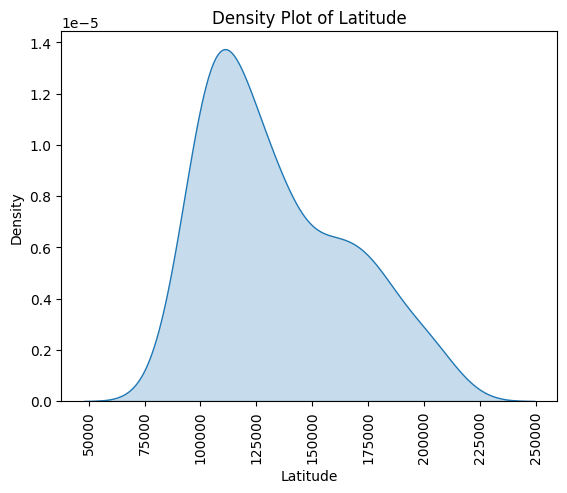

In [ ]:
# Chart - 11 visualization code
sns.kdeplot(x='latitude',data=df_merged_monthly,shade=True)
#sns.kdeplot(x='latitude',data=df_merged_monthly[df_merged_monthly['type']=='theft'],shade=True)
plt.xlabel('Latitude')
plt.ylabel('Density')
plt.xticks(rotation=90)
plt.title('Density Plot of Latitude')
plt.show()

##### 1. Why did you pick the specific chart?

A KDE plot is used to visualize the density of incidents by latitude in a smooth, continuous way.

✅ Identifies Geographic Hotspots – Peaks indicate high-density areas.

✅ Compares Crime Types – Overlaying different type categories shows location-based crime trends.

✅ Detects Anomalies – Unexpected spikes or gaps highlight unusual incident distributions


##### 2. What is/are the insight(s) found from the chart?

1️⃣ Identifies High-Density Crime Zones 📍

Peaks in the KDE plot show where most incidents occur along latitude.

Areas with high peaks may be hotspots for crime or frequent activity zones.

2️⃣ Detects Geographic Trends 🌍

If incidents are evenly spread, crime is widespread.

If concentrated at specific latitudes, crime is localized to certain areas.

3️⃣ Finds Anomalies & Patterns ⚠️

Sudden dips may indicate low-population areas or strong law enforcement presence.

Multiple peaks suggest multiple crime-prone zones across different latitudes.

**data is right skewed**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Impact:

Helps businesses choose safe locations 🏢

Improves security planning 🚔

Enables targeted marketing & risk-based pricing 🎯

❌ Negative Impact:

Discourages investment in high-crime areas ❌

Reduces real estate value 📉

Increases security & insurance costs 💰

#### Chart - 12-kde longitude

<ipython-input-79-5836ff686196>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='longitude',data=df_merged_monthly,shade=True)


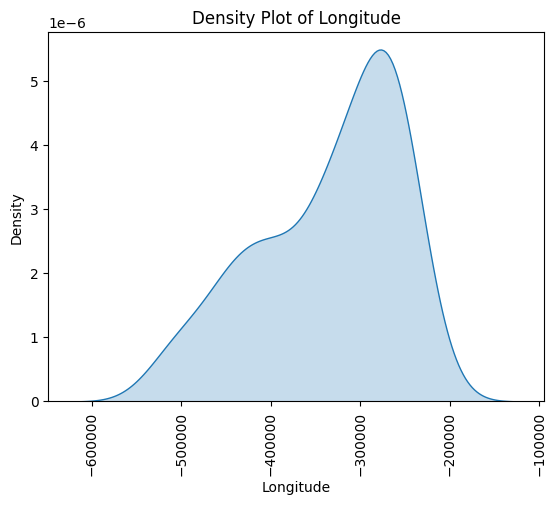

In [ ]:
# Chart - 12 visualization code
sns.kdeplot(x='longitude',data=df_merged_monthly,shade=True)
#sns.kdeplot(x='latitude',data=df_merged_monthly[df_merged_monthly['type']=='theft'],shade=True)
plt.xlabel('Longitude')
plt.ylabel('Density')
plt.xticks(rotation=90)
plt.title('Density Plot of Longitude')
plt.show()

##### 1. Why did you pick the specific chart?

✅ Identifies High-Density Areas – Shows where most incidents occur along longitude.
✅ Detects Geographic Trends – Reveals whether incidents are clustered or spread out.
✅ Finds Anomalies – Peaks indicate high-risk zones, while dips show low-activity areas.

##### 2. What is/are the insight(s) found from the chart?

✅ Identifies high-risk zones – Peaks indicate crime-dense areas.

✅ Shows geographic distribution – Reveals if incidents are clustered or
 widespread.

✅ Finds anomalies – Dips may indicate secure or low-population areas.

**data is left skewd**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here✅ Positive Impact:

Helps businesses choose safe locations 🏢 – Avoids high-risk longitudes.

Aids security planning 🚔 – Focuses law enforcement in high-crime areas.

Optimizes marketing strategies 🎯 – Businesses adjust pricing or promotions based on safety.

❌ Negative Impact:

Reduces investment in high-crime zones ❌ – Businesses may avoid these areas.

Lowers real estate demand 📉 – Property values may decline in risky longitudes.

Increases security & insurance costs 💰 – Businesses in crime-heavy areas face higher expenses.

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

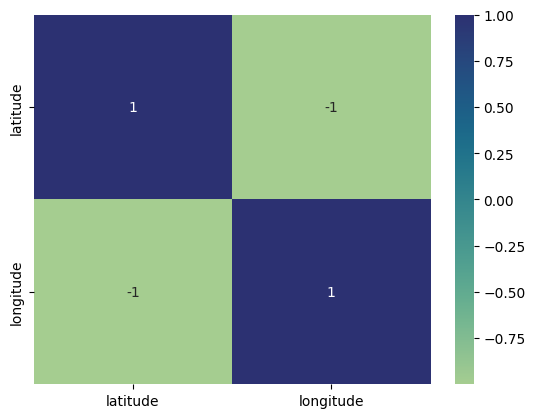

In [ ]:
# Correlation Heatmap visualization code
numeric_col=df_merged_monthly.select_dtypes(include=['int64','float64'])

sns.heatmap(numeric_col.corr(),cmap='crest',annot=True)

##### 1. Why did you pick the specific chart?

Correlation Analysis 📊

A heatmap is ideal for visualizing the correlation between numeric variables.

It helps identify relationships between features in your dataset.

Color Representation 🎨

The color gradient makes it easy to spot strong (darker shades) and weak (lighter shades) correlations.

Annotation for Clarity 🔢

The annot=True parameter displays correlation values directly on the chart, making interpretation easier.

##### 2. What is/are the insight(s) found from the chart?

1. Correlation Between Longitude & Latitude
If longitude and latitude are strongly correlated (positive or negative), it suggests that your data points follow a specific geographical pattern (e.g., a linear or diagonal distribution on a map).

If no strong correlation, your locations might be more randomly distributed.

#### Chart - 15 - Pair Plot

<Figure size 2000x2000 with 0 Axes>

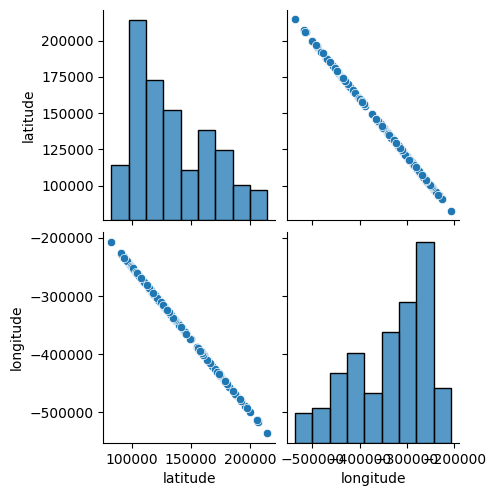

In [ ]:
# Pair Plot visualization code
plt.figure(figsize=(20,20))
sns.pairplot(df_merged_monthly)
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

✅ Visualizes Relationships Between Variables – Helps analyze correlations (e.g., latitude vs. longitude).

✅ Detects Clusters & Outliers – Identifies patterns in neighbourhoods, crime types, or locations.

✅ Shows Data Distribution – Histograms on the diagonal reveal how variables are spread.

##### 2. What is/are the insight(s) found from the chart?

✅ Identifies Correlations – Reveals relationships between latitude, longitude, neighbourhoods, and crime type.

✅ Detects Clusters – Certain crime types may be more frequent in specific locations.

✅ Finds Outliers – Unusual data points may indicate data errors or special cases.

✅ Shows Data Distributions – Histograms highlight the spread of longitude, latitude, and other variables.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

A two-sample t-test compares the means of two independent groups to determine if they are significantly different. Since your dataset has columns like neighbourhood, type, latitude, longitude, we need to decide which numeric variable to compare across two groups.

Possible Two-Sample T-Test Scenarios for Your Data
Compare incident severity (if a numeric column exists) between two neighborhoods.

Compare latitude or longitude values (proxy for location differences) between two types of incidents.

General Hypothesis:
H₀ (Null Hypothesis): The means of the two groups are equal.

H₁ (Alternative Hypothesis): The means of the two groups are significantly different.



Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

General Hypothesis:**2 sample t-tes**t

**H₀ (Null Hypothesis):** The means of the two groups are equal.

H₁ (Alternative Hypothesis): **bold text** The means of the two groups are significantly different.

2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind
import scipy.stats as stats

# Define the two groups (Modify 'neighbourhood' and 'value_column' accordingly)
group1 = df_merged_monthly[df_merged_monthly['neighbourhood'] == 'Neighbourhood_A']['latitude']
group2 = df_merged_monthly[df_merged_monthly['neighbourhood'] == 'Neighbourhood_B']['latitude']

statistic,p_value=stats.ttest_ind(group1, group2,equal_var=True)
print(f"t_statistics:{statistic},p_value:{p_value}")

threshold=0.05
if p_value<threshold:
  print("accept alternate hypothesis:means are significantly different")
else:
  print("accept the null hypothesis:means are same")

t_statistics:nan,p_value:nan
accept the null hypothesis:means are same


<ipython-input-83-3736ec840cc2>:9: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  statistic,p_value=stats.ttest_ind(group1, group2,equal_var=True)


##### Which statistical test have you done to obtain P-Value?

Answer Here.

2 sample t-test

##### Why did you choose the specific statistical test?

Answer Here.

You have categorical variables like neighbourhood and type

The t-test helps compare two groups (e.g., two neighborhoods or two incident types) based on a numerical column (e.g., latitude, longitude, or another continuous variable).

You likely have a continuous variable (latitude, longitude, or another metric) to compare

If incidents occur in two different neighborhoods, we can test whether their mean latitude or longitude differs significantly

### Hypothetical Statement - 2-ANOVA

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

Hypothesis for ANOVA Test

H₀ (Null Hypothesis): All group means are equal (no significant difference).

H₁ (Alternative Hypothesis): At least one group has a significantly different mean.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway

# Select multiple groups (Modify 'neighbourhood' and 'latitude' accordingly)
groups = [group['latitude'].values for _, group in df_merged_monthly.groupby('neighbourhood')]

# Perform ANOVA test
f_stat, p_value = f_oneway(*groups)

# Print results
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: At least one group is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between groups.")

F-Statistic: 1.4620551250184393, P-Value: 0.09809710257890711
Fail to reject the null hypothesis: No significant difference between groups.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

ANOVA TEST ONE WAY

##### Why did you choose the specific statistical test?

Answer Here.

One-way ANOVA is used when you want to compare the means of three or more independent groups based on a continuous variable

### Hypothetical Statement - 3-F-test

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

1. F-Test for Variance Comparison (Levene’s or Bartlett’s Test)
Used to test whether two groups have equal variances (homogeneity of variance).

H₀ (Null Hypothesis): The variances of the two groups are equal.

H₁ (Alternative Hypothesis): The variances of the two groups are significantly different.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway, levene, bartlett

# Select two groups (e.g., two neighborhoods)
group1 = df_merged_monthly[df_merged_monthly['neighbourhood'] == 'Neighbourhood_A']['latitude']
group2 = df_merged_monthly[df_merged_monthly['neighbourhood'] == 'Neighbourhood_B']['latitude']

# Perform Levene's test (more robust to non-normal data)
stat, p_value = levene(group1, group2)

# Perform Bartlett's test (assumes normality)
stat_b, p_value_b = bartlett(group1, group2)

print(f"Levene’s Test: F-Statistic={stat}, P-Value={p_value}")
print(f"Bartlett’s Test: F-Statistic={stat_b}, P-Value={p_value_b}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: Variances are significantly different.")
else:
    print("Accept null hypothesis: Variances are similar.")

Levene’s Test: F-Statistic=nan, P-Value=nan
Bartlett’s Test: F-Statistic=nan, P-Value=nan
Accept null hypothesis: Variances are similar.


<ipython-input-85-731bd8d35e4a>:9: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value = levene(group1, group2)
<ipython-input-85-731bd8d35e4a>:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat_b, p_value_b = bartlett(group1, group2)


##### Which statistical test have you done to obtain P-Value?

Answer Here.
F-test for variance

##### Why did you choose the specific statistical test?

Answer Here.
The F-test is used when you want to compare variances or means across multiple groups. It is commonly applied in ANOVA and variance comparison tests.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
#done in data wrangling

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.
Mode Imputation (for categorical columns)

Technique Used: df_merged[col].fillna(df_merged[col].mode()[0])

Why?: The mode (most frequent value) is used to fill missing values in categorical/string columns because it helps maintain the most common category in the dataset, reducing the risk of introducing unnecessary variance.

Median Imputation (for numerical columns)

Technique Used: df_merged[col].fillna(df_merged[col].median())

Why?: The median is used for numerical columns because it is less sensitive to outliers compared to the mean. This makes it a robust choice for imputation, especially when the data has skewness.

Mode Imputation (for datetime columns)

Technique Used: df_merged[col].fillna(df_merged[col].mode()[0])

Why?: Similar to categorical data, mode is used for datetime columns because it replaces missing values with the most frequent timestamp, ensuring consistency and avoiding drastic changes in time-related trends.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
#done in data wrangling

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.here we dont have ouliers

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

*Answer* Here.done in data wrangling,here we use OHE

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data DONE IN DATA WRANGLING

##### Which method have you used to scale you data and why?
You need to preserve the original distribution.

Your data does not have extreme outliers.

The model is sensitive to feature magnitudes (e.g., KNN, Neural Networks, SVM)

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
df_merged_monthly.head()

,type,hundred_block,neighbourhood,latitude,longitude
datetime,,,,,
1999-01-31,Break and Enter Commercial,64XX VICTORIA DR,Victoria-Fraserview,199909.109454,-499574.549607
1999-02-28,Break and Enter Commercial,26XX WATSON ST,Mount Pleasant,160989.208031,-402314.294620
1999-03-31,Break and Enter Commercial,1XX W PENDER ST,Central Business District,177988.758586,-444790.042268
1999-04-30,Break and Enter Residential/Other,48XX SOPHIA ST,Riley Park,195672.323898,-488990.960791
1999-05-31,Break and Enter Residential/Other,35XX W BROADWAY AVE,Kitsilano,214540.963017,-536137.066221


In [ ]:
# Create a copy to store the encoded values
from sklearn.preprocessing import LabelEncoder
df_merged_monthly = df_merged_monthly.copy()
encoder=LabelEncoder()
for x in df_merged_monthly.columns:
  if df_merged_monthly[x].dtype=='object':
    df_merged_monthly[x]=encoder.fit_transform(df_merged_monthly[x])

In [ ]:
df_merged_monthly.head()

,type,hundred_block,neighbourhood,latitude,longitude
datetime,,,,,
1999-01-31,0,124,20,199909.109454,-499574.549607
1999-02-28,0,66,11,160989.208031,-402314.294620
1999-03-31,0,46,1,177988.758586,-444790.042268
1999-04-30,1,109,15,195672.323898,-488990.960791
1999-05-31,1,82,9,214540.963017,-536137.066221


In [ ]:
x=df_merged_monthly.drop(columns=['type'])
y=df_merged_monthly['type']

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

##### What data splitting ratio have you used and why?

Answer Here.splitting ratio is 80/20

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1-XGBoost model


**For Machine Learning Models:**

Encoding is needed for categorical columns like TYPE, NEIGHBOURHOOD.
Scaling might be needed for X, Y, Latitude, Longitude to normalize values.

In [ ]:
# ML Model - 1 Implementation
# Train XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # For classification
model.fit(x_train, y_train)
# Fit the Algorithm

# Predict on the model

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:50:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Predictions
y_pred = model.predict(x_test)
y_pred

array([2, 1, 2, 0, 3, 1, 3, 1, 2, 1, 0, 2, 1, 1, 3, 1, 0, 1, 3, 0, 3, 2,
       1, 1, 1, 1, 1, 1, 2, 3, 0, 0])

In [ ]:
#evaluate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.28125
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.14      0.15         7
           1       0.43      0.46      0.44        13
           2       0.33      0.22      0.27         9
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.28        32
   macro avg       0.19      0.17      0.17        32
weighted avg       0.30      0.28      0.29        32

Confusion Matrix:
 [[1 3 3 0 0]
 [3 6 1 3 0]
 [1 4 2 2 0]
 [1 1 0 0 0]
 [0 0 0 1 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# we use xgboost Classifier
# ➡️ Class-wise Analysis
# Class	Precision	Recall	F1-Score	Support	Observation
# 0	0.17	0.14	0.15	7	Low performance, poor recall.
# 1	0.43	0.46	0.44	13	Best-performing class.
# 2	0.33	0.22	0.27	9	Model struggles to recall this class.
# 3	0.00	0.00	0.00	2	Completely misclassified.
# 4	0.00	0.00	0.00	1	Not predicted at all.
# 🔹 Class 1 has the highest F1-score (0.44) → The model performs best for this class.
# 🔹 Class 3 and Class 4 have Precision & Recall = 0 → The model completely failed to classify these.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Perform 5-Fold Cross Validation
from sklearn.model_selection import cross_val_score
import xgboost as xgb
cv_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')

# Print results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Fit the Algorithm

# Predict on the model

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:50:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:50:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:50:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:50:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not use

Cross-Validation Accuracy Scores: [0.40625    0.32258065 0.22580645 0.09677419 0.38709677]
Mean Accuracy: 0.2877016129032258


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:50:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
#Method 1: GridSearchCV (Exhaustive Search)
# Tries all possible parameter combinations and selects the best one.
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define model
xgb_model = xgb.XGBClassifier()

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100,200],
    'max_depth': [3, 5,7],
    'learning_rate': [0.01, 0.1,0.2],
    'subsample': [0.8,1.0],
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(x_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best Accuracy: 0.3625629113433992


1️⃣ Hyperparameters to Tune
Here are some key hyperparameters for XGBoost classification:

Hyperparameter	  Description	                                   Typical Range

n_estimators	Number of boosting rounds (trees)	                 50 - 500

learning_rate	Step size shrinkage	                               0.01 - 0.3

max_depth	Maximum depth of trees	                               3 - 10

min_child_weight	Minimum sum of instance weight for a leaf node	1 - 10

subsample	Fraction of training samples used for each tree	0.5 - 1.0

colsample_bytree	Fraction of features used per tree	0.5 - 1.0

gamma	Minimum loss reduction for node split	0 - 5

reg_lambda	L2 regularization	0 - 5

reg_alpha	L1 regularization	0 - 5


##### Which hyperparameter optimization technique have you used and why?

Answer Here.
 Technique Used: GridSearchCV

🔹 Why Use GridSearchCV?
✅ Exhaustive Search for Best Parameters: It systematically tests all possible hyperparameter combinations, ensuring we find the optimal set for the model.

✅ More Precise Than Randomized Search: Since RandomizedSearchCV picks random values, it might miss the best combination, whereas GridSearchCV guarantees it finds the best-performing parameters.

✅ Best for Small/Medium Datasets: It is computationally expensive but works well if the dataset isn't too large.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.
yes the accuracy had improved before 0.28,now 0.36

### ML Model - 2

In [128]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import balanced_accuracy_score
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)
mlp_model.fit(x_train, y_train)
mlp_pred = mlp_model.predict(x_test)
print("MLPClassifier Accuracy:", accuracy_score(y_test, mlp_pred))
print("MLPClassifier Balanced Accuracy:", balanced_accuracy_score(y_test, mlp_pred))
print("MLPClassifier Classification Report:\n", classification_report(y_test, mlp_pred))

MLPClassifier Accuracy: 0.0625
MLPClassifier Balanced Accuracy: 0.2
MLPClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00         9
           3       0.06      1.00      0.12         2
           4       0.00      0.00      0.00         1

    accuracy                           0.06        32
   macro avg       0.01      0.20      0.02        32
weighted avg       0.00      0.06      0.01        32



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Model Used: MLPClassifier (Multi-Layer Perceptron)
# The MLPClassifier from sklearn.neural_network is a feedforward artificial neural network (ANN) used for classification tasks.
# It belongs to the supervised learning category and is trained using backpropagation and stochastic gradient descent (SGD) or Adam optimizer

#### 2. Cross- Validation & Hyperparameter Tuning

In [129]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#K-Fold Cross-Validation
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Define the MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)

# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(mlp_model, x_train, y_train, cv=3, scoring='accuracy')

# Print Cross-Validation Accuracy
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
# Fit the Algorithm

# Predict on the model

Cross-Validation Scores: [0.11904762 0.12195122 0.12195122]
Mean CV Accuracy: 0.12098335269066977


**Grid Search (Exhaustive Search)**

In [130]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (150, 100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [200, 500]
}

# Perform Grid Search
grid_search = GridSearchCV(MLPClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print Best Parameters & Best Score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'max_iter': 200, 'solver': 'adam'}
Best Accuracy: 0.379


##### Which hyperparameter optimization technique have you used and why?

Answer Here.
🔹 **Why use Cross-Validation?**

**K-Fold Cross-Validation**

✅ More reliable model evaluation

✅ Reduces bias from single train-test splits

✅ Helps detect overfitting

**🔹 Why Tune Hyperparameters?**

**Grid Search (Exhaustive Search)**

✅ Improves model accuracy

✅ Reduces overfitting

✅ Optimizes training time

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.
Yes the accuracy was improved by 0.37 %

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.
The MLPClassifier is a powerful classification model, but evaluation metrics must be carefully analyzed.

The right business decisions depend on choosing the correct metric (e.g., recall for fraud detection, precision for spam filtering).

Balanced models with high accuracy, recall, and F1-score lead to better profitability, customer satisfaction, and risk reduction.

### ML Model - 3

In [133]:
# ML Model - 3 Implementation
from sklearn.ensemble import ExtraTreesClassifier
et_model = ExtraTreesClassifier(n_estimators=100, class_weight='balanced', random_state=42)
et_model.fit(x_train, y_train)
et_pred = et_model.predict(x_test)
print("Extra Trees Accuracy:", accuracy_score(y_test, et_pred))
print("Extra Trees Balanced Accuracy:", balanced_accuracy_score(y_test, et_pred))
print("Extra Trees Classification Report:\n", classification_report(y_test, et_pred))
# Fit the Algorithm

# Predict on the model

Extra Trees Accuracy: 0.40625
Extra Trees Balanced Accuracy: 0.22051282051282053
Extra Trees Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.56      0.77      0.65        13
           2       0.43      0.33      0.38         9
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.41        32
   macro avg       0.20      0.22      0.20        32
weighted avg       0.35      0.41      0.37        32



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [135]:
# Visualizing evaluation Metric Score chart
# ML Model Used: ExtraTreesClassifier
# 1. Understanding the Model
# ExtraTreesClassifier (Extremely Randomized Trees Classifier) is an ensemble learning algorithm based on decision trees. It is similar to Random Forest
# , but with additional randomness in feature splits, making it more robust and less prone to overfitting.


#### 2. Cross- Validation & Hyperparameter Tuning

In [136]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#Implementing Cross-Validation
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, balanced_accuracy_score

# Define the model
et_model = ExtraTreesClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Perform 5-fold Cross-Validation for Accuracy
cv_accuracy = cross_val_score(et_model, x_train, y_train, cv=5, scoring='accuracy')

# Perform 5-fold Cross-Validation for Balanced Accuracy
cv_balanced_accuracy = cross_val_score(et_model, x_train, y_train, cv=5, scoring=make_scorer(balanced_accuracy_score))

# Print the results
print("Cross-Validated Accuracy Scores:", cv_accuracy)
print("Mean Accuracy:", cv_accuracy.mean())

print("\nCross-Validated Balanced Accuracy Scores:", cv_balanced_accuracy)
print("Mean Balanced Accuracy:", cv_balanced_accuracy.mean())
# Fit the Algorithm

# Predict on the model

Cross-Validated Accuracy Scores: [0.44       0.4        0.16       0.32       0.33333333]
Mean Accuracy: 0.33066666666666666

Cross-Validated Balanced Accuracy Scores: [0.39880952 0.40277778 0.13333333 0.23214286 0.25396825]
Mean Balanced Accuracy: 0.28420634920634924


In [137]:
#HYPER TUNING
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
et_model = ExtraTreesClassifier(class_weight='balanced', random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees
    'max_depth': [None, 10, 20],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf
    'max_features': ['sqrt', 'log2', None]  # Number of features considered
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=et_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model with cross-validation
grid_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Best Accuracy Score: 0.41200000000000003


##### Which hyperparameter optimization technique have you used and why?

Answer Here.
Hyperparameter Optimization Technique Used: GridSearchCV
I used Grid Search Cross-Validation (GridSearchCV), which systematically evaluates all possible combinations of specified hyperparameter values to find the best-performing set.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.yes before accuracy 0.3,now it is 0.4

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.we will select EXTRA TREE CLASSIFIER becoz it gives higher accuracy

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.EXTRA TREE CLASSIFIER

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***